# Neural and Evolutionary Learning - Final Project

## Notebook 1 - Exploratory Data Analysis

|       Student Name      |    Student ID   |
|           ---           |       ---       |
|     Andriani Kakoulli   |     20230484    |
|       Susana Pires      |     20230540    |

### **1. Imports**

In [1]:
import os
import csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import IFrame

### **2. Dataset**

Data is almost cleaned. <br>

During the class this was mentioned - but **it's important to properly deal with missing values**: <br>

Dry days between lactation cycles, during the end of pregnancy to avoid distress the cow. <br>
Lactation cycle starts on delivery date. <br>
*Hear again* - two possible models depending on lactation periods. <br>
From 2nd lactation cycle, the cow is considered mature so there is no dry off period? <br>
<br>

"Maintaining (or increasing) body condition during the dry period is the key to ensuring cows have adequate body reserves for early lactation.
<br>If cows calve with adequate body reserves, they can cycle within two or three months after calving. If cows calve in poor condition, milk production suffers in early lactation because body reserves are not available to contribute energy." *Managing Cow Lactation Cycles-The cattle site*

Dry period usually lasts 2 months, but can vary from 45 to 65 days.

#### **2.1. Common properties**

In [2]:
dt = pd.read_csv('./datamart/data_project_nel.csv')
dt

,lactation,delivery_age_years,dim,dry_days,forage_kg_day,rumination_min_day,milk_kg_day,milk_kg_min_robot,milkings_day,errors_by_100_milkings,high_cdt_by_100_milkings,watery_by_100_milkings,refusals_by_milking,colostrum_separated_kg
0,7,7.750000,414,56.0,4.310918,434.814010,34.082367,3.695699,2.478261,2.046784,0.0,0.000000,0.077973,0.0
1,8,9.083333,357,78.0,4.167087,589.500000,36.170868,4.024165,2.176471,0.900901,0.0,0.000000,0.014157,0.0
2,6,7.666667,315,69.0,4.903333,542.577778,43.371746,2.715252,2.387302,1.063830,0.0,0.132979,0.045213,12.8
3,7,8.666667,362,69.0,4.294724,628.371901,41.683149,2.733291,2.193370,1.763224,0.0,0.000000,0.061713,16.2
4,5,6.500000,427,58.0,4.798618,479.334112,37.916393,1.888608,3.142857,0.745156,0.0,0.000000,0.444858,20.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,1,1.916667,291,NaN,3.765704,557.993151,35.426804,3.178905,2.563574,1.206434,0.0,0.000000,0.079088,0.0
320,1,1.750000,310,NaN,3.836903,549.466238,36.584194,1.633004,2.951613,2.622951,0.0,0.000000,0.240437,0.0
321,1,1.833333,293,NaN,3.755973,579.557823,37.039590,1.864855,2.747440,3.726708,0.0,0.000000,0.150311,0.0
322,1,1.666667,293,NaN,3.939010,546.159864,36.980546,3.395705,3.112628,1.535088,0.0,0.000000,0.195175,0.0


In [3]:
# Checking features
dt.columns

Index(['lactation', 'delivery_age_years', 'dim', 'dry_days', 'forage_kg_day',
       'rumination_min_day', 'milk_kg_day', 'milk_kg_min_robot',
       'milkings_day', 'errors_by_100_milkings', 'high_cdt_by_100_milkings',
       'watery_by_100_milkings', 'refusals_by_milking',
       'colostrum_separated_kg'],
      dtype='object')

In [4]:
# To visualize the pdf inside the notebook - maybe delete?

#IFrame('./0_Project_Data_Dictionary.pdf', width=1000, height=300)

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lactation                 324 non-null    int64  
 1   delivery_age_years        324 non-null    float64
 2   dim                       324 non-null    int64  
 3   dry_days                  177 non-null    float64
 4   forage_kg_day             324 non-null    float64
 5   rumination_min_day        324 non-null    float64
 6   milk_kg_day               324 non-null    float64
 7   milk_kg_min_robot         324 non-null    float64
 8   milkings_day              324 non-null    float64
 9   errors_by_100_milkings    324 non-null    float64
 10  high_cdt_by_100_milkings  324 non-null    float64
 11  watery_by_100_milkings    324 non-null    float64
 12  refusals_by_milking       324 non-null    float64
 13  colostrum_separated_kg    324 non-null    float64
dtypes: float64

#### **2.2. Unique values of each variable**

In [6]:
for col in dt.columns:
    print(col + ':', sorted(dt[col].unique()), '\n')

lactation: [1, 2, 3, 4, 5, 6, 7, 8] 

delivery_age_years: [1.66666666666667, 1.75, 1.83333333333333, 1.91666666666667, 2.0, 2.08333333333333, 2.16666666666667, 2.25, 2.33333333333333, 2.41666666666667, 2.5, 2.66666666666667, 2.75, 2.83333333333333, 2.91666666666667, 3.0, 3.08333333333333, 3.16666666666667, 3.25, 3.33333333333333, 3.41666666666667, 3.5, 3.66666666666667, 3.75, 3.83333333333333, 3.91666666666667, 4.0, 4.08333333333333, 4.16666666666667, 4.25, 4.33333333333333, 4.41666666666667, 4.5, 4.66666666666667, 4.75, 4.83333333333333, 4.91666666666667, 5.0, 5.08333333333333, 5.33333333333333, 5.41666666666667, 5.5, 5.75, 5.83333333333333, 5.91666666666667, 6.0, 6.08333333333333, 6.16666666666667, 6.33333333333333, 6.5, 6.66666666666667, 6.83333333333333, 7.0, 7.25, 7.66666666666667, 7.75, 7.83333333333333, 7.91666666666667, 8.66666666666667, 9.08333333333333] 

dim: [249, 250, 260, 267, 268, 269, 270, 276, 277, 278, 279, 280, 281, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 2

#### **2.3. Missing values**

In [7]:
dt.isna().sum()

lactation                     0
delivery_age_years            0
dim                           0
dry_days                    147
forage_kg_day                 0
rumination_min_day            0
milk_kg_day                   0
milk_kg_min_robot             0
milkings_day                  0
errors_by_100_milkings        0
high_cdt_by_100_milkings      0
watery_by_100_milkings        0
refusals_by_milking           0
colostrum_separated_kg        0
dtype: int64

##### 2.3.1 Inspection of missing values of variable *'dry_days'*


There are 147 Nans out of 325 values of the variables "dry_days".

Let's inspect the reason why we have no information on those values.

In [8]:
dt[dt['dry_days'].isna()]['lactation'].unique()

array([1], dtype=int64)

In [9]:
dt[dt['lactation']==1]['dry_days'].unique()

array([nan])

We can observe that all missing values are from cows that are on the 1st lactation cycle. <br>
According to the Metadata, *dry_days* is the 'difference in days between the end date of the previous and the start date of the corresponding lactation period'. <br>
Thus, the missing values of dry days make sense since a cow in its first lactation period would not have any dry days recorded as there is no preceding lactation.

The way we can choose to handle these missing values is threefold:
1) Remove data with NaNs, therefore lactation 1 
2) Remove column of *dry_days* and keep all the other data
3) Remove column pf *dry_days* AND all other lactations except of lactation 1 (as lactation 1 has very different data from the rest of lactations)

We choose to proceed with option (1) as it gives a way to overcome the problem of differences in data of lactaction 1 vs lactations 2-8, and it gives us the most amount of data possible.<br>
Moreover, it is necessary to save the indexes that have been removed from 'dt' in order to be removed from target 'y_lact' as well.

In [10]:
indexes_to_remove = dt[dt['lactation'] == 1].index
dt = dt.drop(indexes_to_remove)
# Reset index
dt.reset_index(drop=True, inplace=True)

In [11]:
# Verifying the result
dt[dt['lactation'] == 1]

,lactation,delivery_age_years,dim,dry_days,forage_kg_day,rumination_min_day,milk_kg_day,milk_kg_min_robot,milkings_day,errors_by_100_milkings,high_cdt_by_100_milkings,watery_by_100_milkings,refusals_by_milking,colostrum_separated_kg


#### **2.4. Statistics**

In [12]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
lactation,177.0,2.932203,1.222856,2.000000,2.000000,2.000000,4.000000,8.000000
delivery_age_years,177.0,3.972693,1.347975,2.666667,2.916667,3.666667,4.750000,9.083333
dim,177.0,328.231638,44.537491,249.000000,297.000000,317.000000,352.000000,590.000000
dry_days,177.0,65.440678,9.349777,22.000000,61.000000,66.000000,70.000000,112.000000
forage_kg_day,177.0,4.718773,0.676962,3.013143,4.310918,4.757603,5.140906,6.340225
rumination_min_day,177.0,536.357701,54.899761,337.500000,500.277966,543.724684,574.582456,638.546053
milk_kg_day,177.0,43.097863,5.977836,15.355600,39.289935,43.418114,47.212536,59.722312
milk_kg_min_robot,177.0,2.983514,0.824106,1.114385,2.292541,3.016305,3.527679,5.283186
milkings_day,177.0,2.907526,0.554340,2.019802,2.416438,2.807309,3.391525,4.378049
errors_by_100_milkings,177.0,1.145640,2.400540,0.000000,0.000000,0.523560,1.063830,15.754190


Thought behind identifying outliers: comparing mean-median(50%) and median-max

#### **2.5. Exploratory plots**

*Official colours of NOVA IMS.* <br>

**Green**: Pantone 390C   |   CMYK 30/0/100/0   |   RGB 190/214/47   |   HEX #bdd62f   <br>

**Grey**:  Pantone 431C   |   CMYK 10/0/0/72    |   RGB 92/102/108   |   HEX #5b666c

##### Frequency

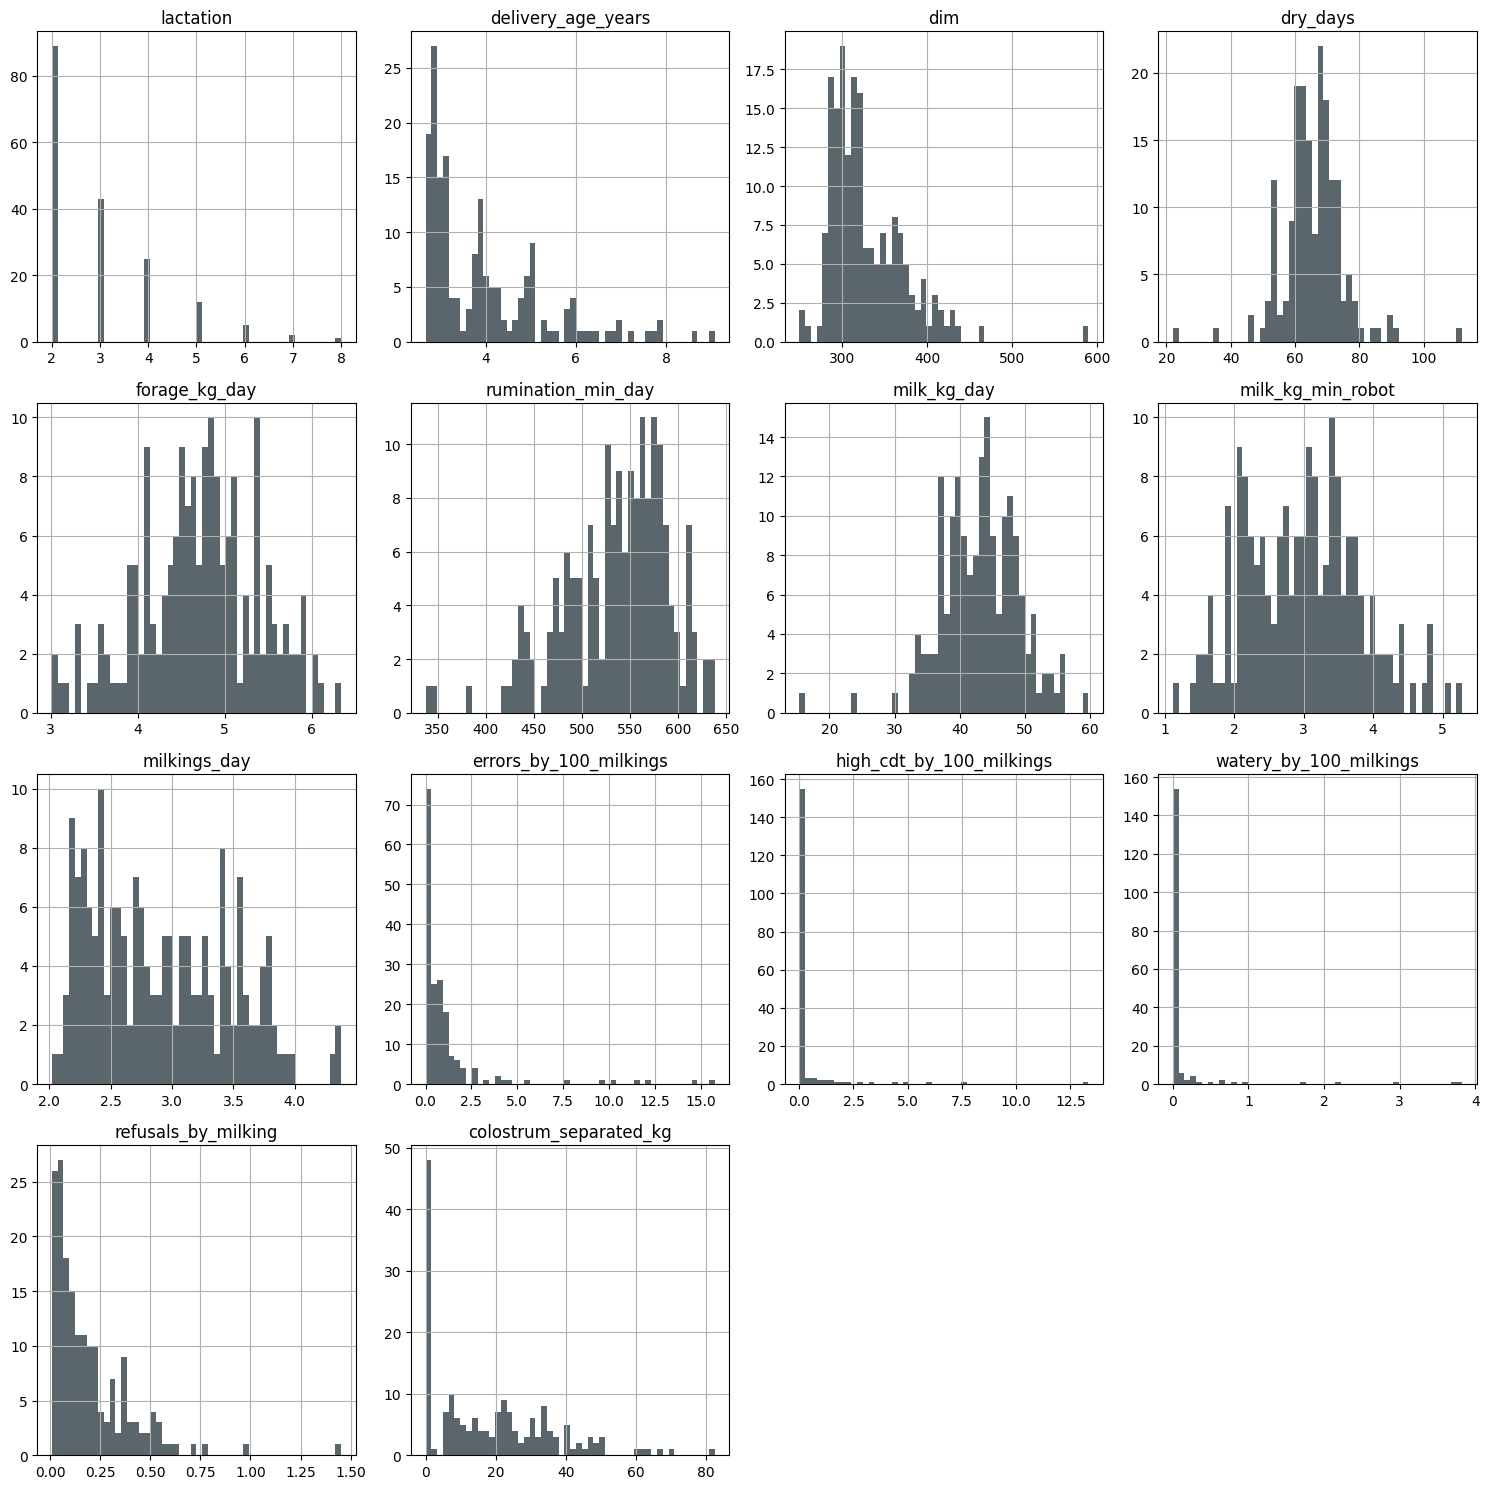

In [13]:
dt.hist(figsize=(15, 15), bins=50, color='#5b666c')
plt.grid(False)
plt.tight_layout()
plt.show()

#####  Outliers

These are real outliers or problems with machine, or data inserted by hand? <br>
But they're considered inside limits by vet professionals. <br>

Created a separate boxplot for each variable so the outliers are more visually understandable.

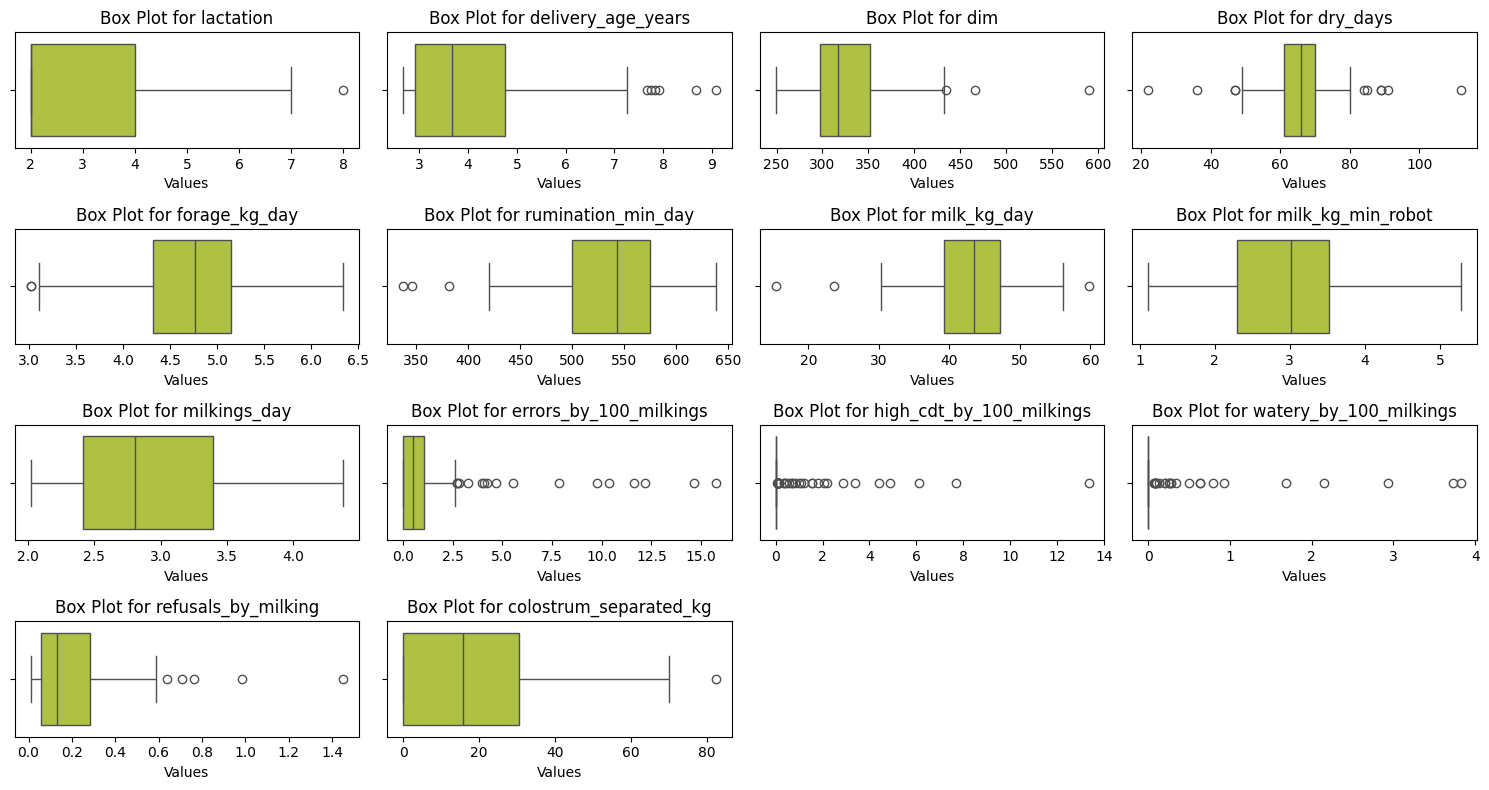

In [14]:
plt.figure(figsize=(15, 8))

for i, column in enumerate(dt.columns):
    plt.subplot(4,4, i+1)
    sns.boxplot(x=dt[column], color="#bdd62f")
    plt.title(f'Box Plot for {column}')
    plt.xlabel("Values")

plt.tight_layout()
plt.show()

#### **2.6. Outliers**

##### 2.6.1 Statistical method for identifying outliers (IQR)

In [15]:
# Initialize dictionaries to store outlier values and counts for each variable
outlier_values = {}
outlier_count = {}
medians = {}

# Iterate through each column
for column in dt.columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the current column
    Q1 = dt[column].quantile(0.25)
    Q3 = dt[column].quantile(0.75)
    
    # Calculate IQR for the current column
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for identifying outliers for the current column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers for the current column
    outliers = (dt[column] < lower_bound) | (dt[column] > upper_bound)
    
    # Store outlier values and count for the current column
    outlier_values[column] = sorted(dt[column][outliers].values.tolist())
    outlier_count[column] = outliers.sum()
    medians[column] = dt[column].median()

# Display outlier count and values for each variable
for column in dt.columns:
    print(f"Outlier Count for {column}: {outlier_count[column]}")
    print(f"Median for {column}: {medians[column]}")
    print(f"Outlier Values for {column}:{outlier_values[column]}\n")


Outlier Count for lactation: 1
Median for lactation: 2.0
Outlier Values for lactation:[8]

Outlier Count for delivery_age_years: 6
Median for delivery_age_years: 3.66666666666667
Outlier Values for delivery_age_years:[7.66666666666667, 7.75, 7.83333333333333, 7.91666666666667, 8.66666666666667, 9.08333333333333]

Outlier Count for dim: 3
Median for dim: 317.0
Outlier Values for dim:[435, 466, 590]

Outlier Count for dry_days: 10
Median for dry_days: 66.0
Outlier Values for dry_days:[22.0, 36.0, 47.0, 47.0, 84.0, 85.0, 89.0, 89.0, 91.0, 112.0]

Outlier Count for forage_kg_day: 2
Median for forage_kg_day: 4.75760330578512
Outlier Values for forage_kg_day:[3.01314285714286, 3.01464]

Outlier Count for rumination_min_day: 3
Median for rumination_min_day: 543.724683544304
Outlier Values for rumination_min_day:[337.5, 345.71237458194, 382.034267912773]

Outlier Count for milk_kg_day: 3
Median for milk_kg_day: 43.4181141439206
Outlier Values for milk_kg_day:[15.3556, 23.5737752161383, 59.7223

In [16]:
for col in dt.columns:
    print(col + ':', sorted(dt[col].unique()), '\n')

lactation: [2, 3, 4, 5, 6, 7, 8] 

delivery_age_years: [2.66666666666667, 2.75, 2.83333333333333, 2.91666666666667, 3.0, 3.08333333333333, 3.16666666666667, 3.25, 3.33333333333333, 3.41666666666667, 3.5, 3.66666666666667, 3.75, 3.83333333333333, 3.91666666666667, 4.0, 4.08333333333333, 4.16666666666667, 4.25, 4.33333333333333, 4.41666666666667, 4.5, 4.66666666666667, 4.75, 4.83333333333333, 4.91666666666667, 5.0, 5.08333333333333, 5.33333333333333, 5.41666666666667, 5.5, 5.75, 5.83333333333333, 5.91666666666667, 6.0, 6.08333333333333, 6.16666666666667, 6.33333333333333, 6.5, 6.66666666666667, 6.83333333333333, 7.0, 7.25, 7.66666666666667, 7.75, 7.83333333333333, 7.91666666666667, 8.66666666666667, 9.08333333333333] 

dim: [249, 250, 260, 276, 278, 280, 281, 283, 284, 285, 286, 287, 288, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 307, 308, 309, 311, 313, 314, 315, 316, 317, 319, 320, 321, 322, 323, 325, 327, 328, 329, 333, 334, 335, 336, 337, 338, 340, 342, 34

##### 2.6.2 Handling Outliers 

Based on histograms, boxplots and IQR statistical method, we identify some extreme outliers: 
<div style="color: grey;"> Thoughts: (will be remove for submition) <br>
'lactation' > 6
<br>'dim'> 450
<br>'dry_days' > 110
<br>20<'milk_kg_day' < 59
<br>'milk_kg_min_robot' > 5.25
<br>'milkings_day' > 5
<br>'errors' > 11 or > 25
<br>'high'> 3 or > 4
<br>'watery' > 1
<br>'refusals_by_milking' > 1.25
<br>'colostrum_separated_kg' > 60 </div>
<br>


A solution would be to remove manually these extreme outliers:

In [17]:
# filtering the values we want to keep in the dataset
manual_filtering=[]
dt_1=[]

manual_filtering = (
    (dt['lactation']<=7)
    &
    (dt['dim']<=500)
    &
    (dt['dry_days']<=110)
    &
    (dt['milk_kg_day']<=59)
    &
    (dt['milk_kg_day']>=20)
    &
    (dt['milk_kg_min_robot']<=5.25)
    &
    (dt['milkings_day']<=5)
    &
    (dt['errors_by_100_milkings']<=25)
    &
    (dt['high_cdt_by_100_milkings']<=13)
    &
    (dt['watery_by_100_milkings']<=1) 
    &
    (dt['refusals_by_milking']<=1.25) 
    &
    (dt['colostrum_separated_kg']<=60)
)

dt_1 = dt[manual_filtering]
print('Percentage of data kept after manually removing outliers:', np.round(dt_1.shape[0] / dt.shape[0], 4))
print('Number of data removed:', dt.shape[0]-dt_1.shape[0], 'out of', dt.shape[0], 'data')

Percentage of data kept after manually removing outliers: 0.8983
Number of data removed: 18 out of 177 data


Due to the small number of observations in our dataset, the solution of removing some outliers is not ideal and not applicable to this problem/dataset.
<br>We shall proceed with creating two datasets, the one we are already working on *'dt'* and one with filtered outliers named *'dt_filtered'*.
<br>Thus, we will train two models to check whether the dataset *with* the outliers gives better results in validation.

*For the dataset _with_ the outliers, we will use robust models that are less sensitive to outliers.<br>
*For the dataset with the _filtered_ outliers, we will transform the data to make them more normally distributed / replace the outliers with less extreme values using the winsorization method.

From theory, it is better to apply logarithmic transformation when the data is right skewed as it can compress the range of large values and expand the range of small values, making the distribution more symmetrical. Square root transformation is useful when the data contains many zero or small values, or when the data is left skewed and log transformation cannot be applied. Observing the histograms of the variables it is concluded that:

* Logarithmic Transformation<br>
'lactation'<br>
'dim'<br>
'milk_kg_min_robot'<br>
'milkings_day'<br>

* Square-root Transformation<br>
'delivery_age_years'<br>
'rumination_min_day'<br>
'errors_by_100_milkings'<br>
'high_cdt_by_100_milkings'<br>
'watery_by_100_milkings'<br>
'refusals_by_milking'<br>
'colostrum_separated_kg'<br>

* No Transformation<br>
'dry_days'<br>
'forage_kg_day'<br>
'milk_kg_day'<br>

In [18]:
dt_filtered = dt.copy()

# Apply logarithmic transformation
dt_filtered['log_lactation'] = np.log(dt_filtered['lactation'] + 1) # Adding 1 to avoid log(0)
dt_filtered['log_dim'] = np.log(dt_filtered['dim'] + 1) 
dt_filtered['log_milk_kg_min_robot'] = np.log(dt_filtered['milk_kg_min_robot'] + 1)
dt_filtered['log_milkings_day'] = np.log(dt_filtered['milkings_day'] + 1)

# Apply the square root transformation
def sqrt_transform_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (column < lower_bound) | (column > upper_bound)
    
    column[outliers] = np.sqrt(column[outliers])
    return column

columns_to_transform = [
    'delivery_age_years',
    'rumination_min_day',
    'errors_by_100_milkings',
    'high_cdt_by_100_milkings',
    'watery_by_100_milkings',
    'refusals_by_milking',
    'colostrum_separated_kg']

for col in columns_to_transform:
    dt_filtered[f'sqr_{col}'] = sqrt_transform_outliers(dt_filtered[col].copy())

##### Display histograms for transformed variables:

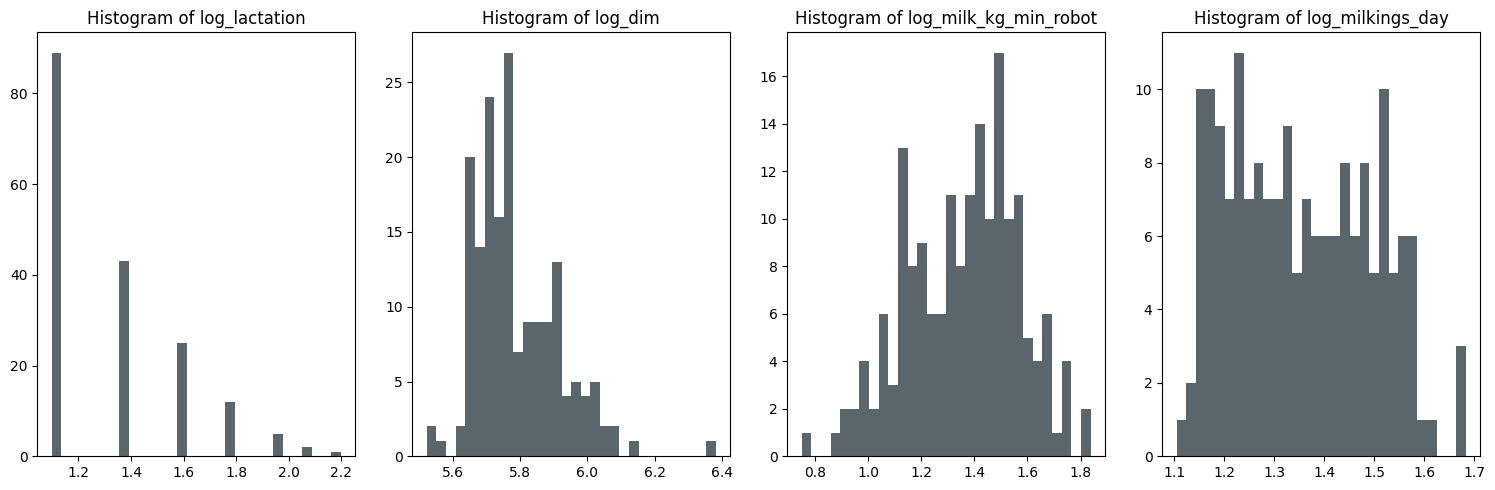

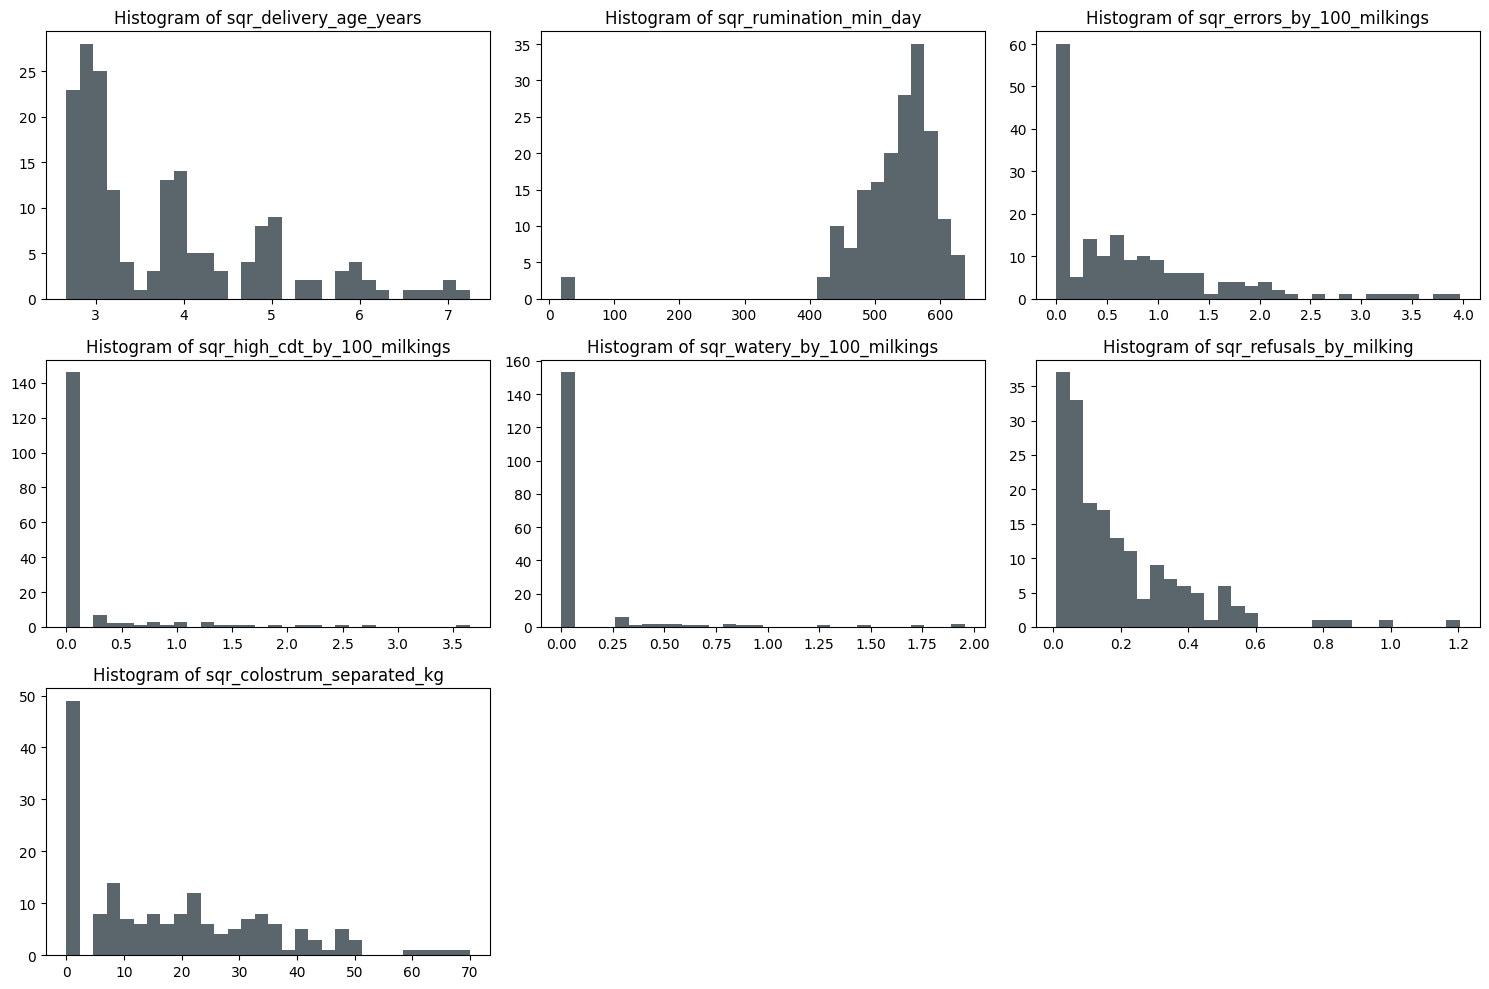

In [19]:
import matplotlib.pyplot as plt

# Plot histograms for log transformed variables
log_columns = ['log_lactation', 'log_dim', 'log_milk_kg_min_robot', 'log_milkings_day']
plt.figure(figsize=(15, 5))
for i, col in enumerate(log_columns, 1):
    plt.subplot(1, 4, i)
    plt.hist(dt_filtered[col], bins=30, color='#5b666c')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Plot histograms for square root transformed variables
sqrt_columns = [f'sqr_{col}' for col in columns_to_transform]
plt.figure(figsize=(15, 10))
for i, col in enumerate(sqrt_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(dt_filtered[col], bins=30, color='#5b666c')
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Remove variables of dt that have been now transformed

In [20]:
columns_to_remove = ['lactation', 'delivery_age_years', 'dim','rumination_min_day', 'milk_kg_min_robot',
       'milkings_day', 'errors_by_100_milkings', 'high_cdt_by_100_milkings',
       'watery_by_100_milkings', 'refusals_by_milking', 'colostrum_separated_kg']

dt_filtered = dt_filtered.drop(columns=columns_to_remove)
# Verifying the result: must have 14 columns
dt_filtered.shape

(177, 14)

### **3. Lactose - target**

Recommended target, but *fat* and *proteins* are also available to work with.

In [21]:
y_lact = pd.read_csv('./datamart/y_lactose.csv')

In [22]:
y_lact['lactose_percent'].isna().sum()

0

In [23]:
y_lact.describe().T

,count,mean,std,min,25%,50%,75%,max
lactose_percent,324.0,4.892862,0.064497,4.707464,4.847754,4.890983,4.932776,5.058967


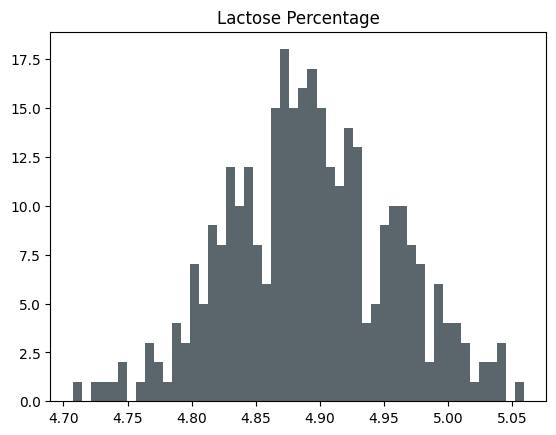

In [24]:
plt.hist(y_lact, bins=50, color='#5b666c')
plt.title('Lactose Percentage')
plt.show()

* Remove the records by index that were removed in **dt** (X_train_val)

In [25]:
y_lact = y_lact.drop(indexes_to_remove)
y_lact.reset_index(drop=True, inplace=True)
# Verify the result: number of rows must be 177
y_lact

,lactose_percent
0,4.953503
1,4.983128
2,4.889104
3,4.868969
4,4.845402
...,...
172,4.964871
173,4.972797
174,4.817548
175,4.943924


* Export to CSV the `dt` & `y_lact`

In order for the function *load_cleaned_dataset* from utils to work, we need to save the dataset into one csv file.

In [26]:
combined_dt = pd.concat([dt, y_lact], axis=1)
combined_ft_filtered = pd.concat([dt_filtered, y_lact], axis=1)

save_directory = './gpolnel/utils/data'

# CSV File after data cleaning (with outliers)
combined_dt.to_csv(os.path.join(save_directory,'dt_cleaned.csv'), index=False)
# CSV File after data cleaning AND after transforming outliers
combined_ft_filtered.to_csv(os.path.join(save_directory,'dt_cleaned_filtered_outliers.csv'), index=False)

EDA is complete!<br>
Further work on the algorithms will be done on **'dt_cleaned'** and **'dt_cleaned_filtered_outliers'**.<br>
Note that *y_lact* target variable is located on the last column of the two files.